FTDL-TAKE HOME EXAM
---
SUBMITTED BY- KUSH GUPTA


Note:-Reference used is Lecture slides.

1.Indicate functions used respectively in Tensorflow and Keras for the selection of the model, the learning rate, the activation, the loss function and the opmizator.

**Function used for the Selection of the Models**:
In Tensorflow, we use Sequential() class to groups a linear stack of layers in the model. The arguments of Sequential are the different layers to include in the model. We can also make a models where the layers are not stacked. To build such a model without stacked layers we can use the class Model() instead of the class Sequential().

Learning rate: The learning rate is a hyperparameter that controls how much the model has to be changed in response to the estimated error each time the model weights are updated. Usually it's value is 0.001

Activation Function: It is a function that is used to get the output of a node. It is also known as Transfer Function. Activation functions in Deep Neural Nerworks are used to introduce nonlinearities and flexibility. There are two types of activation functions present in tensorflow. 
1. Linear, example Identity Activation Function

2. Non-Linear. 
Examples of non-linear activation functions.
1.Tanh
2.Sigmoid
3.Relu
4.Softmax

Loss Function: The loss function is used to determine how far the predicted values deviate from the actual values in the training data. We change the model weights in order to make our loss value minimum. Ex:- sparse_categorical_crossentropy

Optimizer: An optimizer is a function that modifies the parameteres of the neural network, such as weights and learning rate in order to reduce the overall loss and improve the accuracy of the model. Below are the optimizer available in tensorflow
* Adadelta: Optimizer that implements the Adadelta algorithm.
* Adagrad: Optimizer that implements the Adagrad algorithm.
* Adam: Optimizer that implements the Adam algorithm.
* Adamax: Optimizer that implements the Adamax algorithm.
* Ftrl: Optimizer that implements the FTRL algorithm.
* Nadam: Optimizer that implements the NAdam algorithm.
* RMSprop: Optimizer that implements the RMSprop algorithm.
* SGD: Gradient descent (with momentum) optimizer.



In [20]:
'''
#example for Model.

input_size = 784 # Number of inputs to the model
output_size = 10 # output of the model
hidden_layer_size = 50 # Number of nodes in hidden layer
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28,1)),
tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
tf.keras.layers.Dense(output_size,activation='softmax')
])
'''

"\n#example for Model.\n\ninput_size = 784 # Number of inputs to the model\noutput_size = 10 # output of the model\nhidden_layer_size = 50 # Number of nodes in hidden layer\nmodel = tf.keras.Sequential([\ntf.keras.layers.Flatten(input_shape=(28,28,1)),\ntf.keras.layers.Dense(hidden_layer_size,activation='relu'),\ntf.keras.layers.Dense(hidden_layer_size,activation='relu'),\ntf.keras.layers.Dense(output_size,activation='softmax')\n])\n"

In [21]:
'''
#Example of Learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')
'''

"\n#Example of Learning rate\ncustom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)\nmodel.compile(optimizer=custom_optimizer,loss='mean_squared_error')\n"

In [22]:
'''
#Example of optimization algorithm and loss function
model.compile(optimizer='sgd',loss='mean_squared_error')
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
'''

"\n#Example of optimization algorithm and loss function\nmodel.compile(optimizer='sgd',loss='mean_squared_error')\nmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])\n"

2. Write the code both in Tensorflow, Keras for building a MLP with 10 inputs, 2 outputs, 2 hidden layers of 50 units each, that uses Stochastic Gradient Descent as optimizator, Average Square error as loss function and Relu as activation function.

In [23]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import keras as k
from keras.models import Sequential
from keras.layers import Dense

In [24]:
input_size = 10
output_size = 2
hidden_layer_size=50
#model
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(10,)),
tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
tf.keras.layers.Dense(output_size,activation='softmax')
])
#optimization algorithm and loss function
model.compile(optimizer='sgd',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 3,202
Trainable params: 3,202
Non-trainable params: 0
_________________________________________________________________


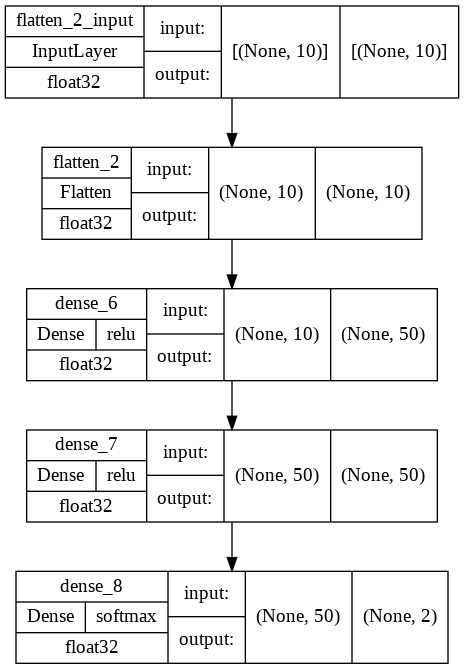

In [25]:
# Demonstration of the model
tf.keras.utils.plot_model(
    model, 
    show_layer_activations=True, 
    show_shapes=True,
    show_dtype=True)

3. Suposse we have a database with 100000 input samples. Write the code in Tensorflow for using minibatches of 100 input samples each.

In [26]:
data_size = 100000
train_data = tf.data.Dataset.from_tensor_slices((np.random.rand(data_size, input_size), np.random.rand(data_size)))

batch_size = 100
batched_train_data = train_data.batch(batch_size)


4. In the same previous database, write the code for normalizing and standardizing the whole dataset.

In [27]:
#Example for Normalizing the Dataset
def scale_function(image,label):
  image=tf.cast(image,tf.float32)
  image/=255.
  return image,label

normalized_train_data=train_data.map(scale_function)

In [28]:
sample_size=100000
X=np.random.rand(sample_size, input_size)

In [29]:
# Example of Rescalaing data using Standardization Method
X = (X - X.min()) / (X.max() - X.min())
print(X)

[[0.05556882 0.50047207 0.14727229 ... 0.2977442  0.05823585 0.65092458]
 [0.04726486 0.95886919 0.18970503 ... 0.10290633 0.29699221 0.85153507]
 [0.81882027 0.05334339 0.75320703 ... 0.09097369 0.4296953  0.93202737]
 ...
 [0.51683001 0.00459609 0.28139117 ... 0.81006736 0.07227748 0.07572794]
 [0.70119576 0.355286   0.74139642 ... 0.85704092 0.92465385 0.85157938]
 [0.29047765 0.34426416 0.98474645 ... 0.30887655 0.69091402 0.8274684 ]]


5. In some cases, for example in linear regression, we can obtain an explicit formula for the optimal weights.

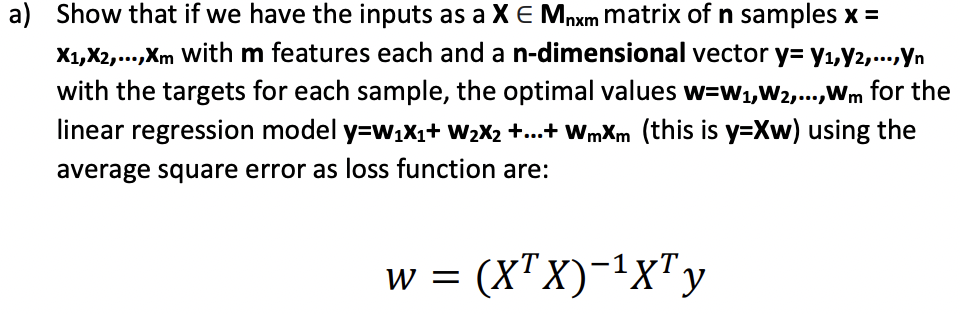

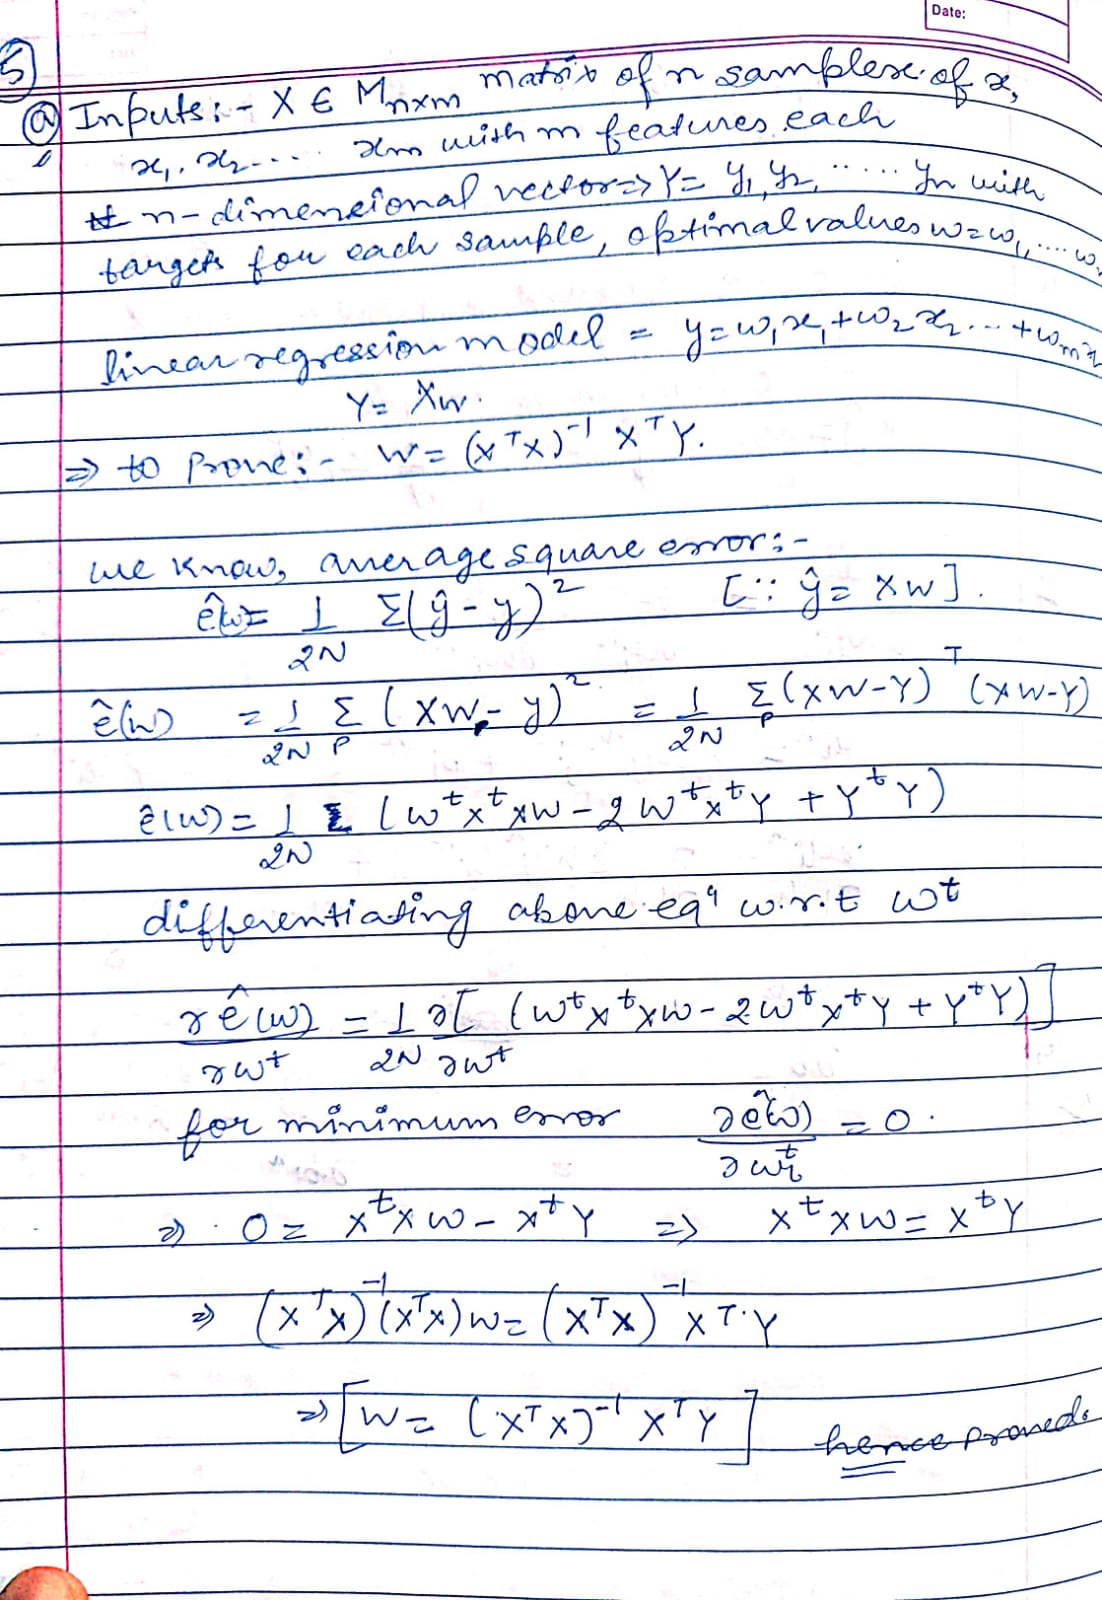

B) Which method do you think is the most costly in computational terms for
obtaining the weights for the previous problem, the explicit formula or the
neural network method.

Ans--> When X is small, simple matrix multiplication is much faster. However, if matrix X is too large, in that case we'll have a lot of labeled data, and the calculating inverse of the matrix requires much more computational cost than the iterative neural network method.



c) What method gives the most exact value of the optimal weights?

Ans-->While calculating analytically, Matrix Multiplication gives the exact values for the optimal weights as the computation use exact digits and approximates good values for the weights. But if we have a well adjusted iterative method, we can acheive similar results.

D) Can you always find the values of the weights using the exact formula
shown in question a?

Ans--> No, We can't always find the values for weights using the exact formula in (a) because if we have a lot of data i.e the matrix X is very large, the inversion of X will require a lot of memory and computation.